# Third Model
Utilizing regularization ridge/lasso.

Data in stats.pkl

First, load in needed packages

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from IPython.core.display import display, HTML    # make sure Jupyter knows to display it as HTML
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import unicodedata
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
pwd

'/Users/patrickbovard/Documents/GitHub/Metis_Project_2'

Next, load my stats dataframe in from teh pickle file:

In [3]:
stats_df = pd.read_pickle("./stats.pkl")

## Data Cleaning:

Using same cleaning steps as in "first_model_notebook":

Fixing pitchers:

In [4]:
stats_df.iloc[714, 22] = 'DH' #Ohtani, 2018
stats_df.iloc[1021, 22] = 'LF' #Eibner, 2016
stats_df.iloc[1498, 22] = 'DH' #Ohtani, 2019
stats_df.iloc[1750, 22] = 'CF' #Gose, 2015
stats_df.iloc[1781, 22] = '1B' #Davis, 2015

Changing Kennys Vargas from IF to 1B:

In [5]:
stats_df.iloc[1477, 22] = '1B' #Kennys Vargas, 2017

In [6]:
stats_df.Position.value_counts()

3B    263
2B    245
C     239
CF    222
1B    218
LF    212
SS    207
RF    200
OF     56
DH     31
Name: Position, dtype: int64

## Visualization:

Visualizing with Seaborn:

In [7]:
stats_df.corr()

Year       Age        PA         G  Avg EV (MPH)  \
Year                 1.000000 -0.050360 -0.177433 -0.259925      0.090235   
Age                 -0.050360  1.000000  0.007203  0.039772     -0.013654   
PA                  -0.177433  0.007203  1.000000  0.914547      0.201251   
G                   -0.259925  0.039772  0.914547  1.000000      0.090639   
Avg EV (MPH)         0.090235 -0.013654  0.201251  0.090639      1.000000   
Avg LA (°)           0.145444  0.044688  0.054227  0.024089      0.098858   
Barrel%              0.217394 -0.059126  0.119729  0.024670      0.734754   
Solid Contact %      0.146280  0.053587  0.128354  0.055503      0.568639   
Hard Hit %           0.190818 -0.013957  0.152829  0.037690      0.924395   
Zone Swing %         0.105675 -0.105471  0.033756  0.035700      0.078073   
Out of Zone Swing % -0.035602 -0.125381  0.029977  0.052812     -0.100522   
Pull %               0.063524  0.044283  0.020088 -0.005901      0.158695   
Straight Away %     -0.051559 -0.019327  0.034291  0.054583     -0.031002   
Oppo %              -0.040768 -0.043534 -0.059823 -0.042227     -0.191750   
GB%                 -0.164337 -0.058080 -0.096653 -0.044732     -0.192306   
FB%                  0.208470  0.053814  0.124765  0.088417      0.278015   
LD %                -0.038431  0.047267  0.043566 -0.016867      0.083149   
Sprint Speed         0.046489 -0.462905  0.027853  0.026060     -0.171607   
wRC+                 0.075645 -0.043366  0.348204  0.187745      0.524570   

                     Avg LA (°)   Barrel%  Solid Contact %  Hard Hit %  \
Year                   0.145444  0.217394         0.146280    0.190818   
Age                    0.044688 -0.059126         0.053587   -0.013957   
PA                     0.054227  0.119729         0.128354    0.152829   
G                      0.024089  0.024670         0.055503    0.037690   
Avg EV (MPH)           0.098858  0.734754         0.568639    0.924395   
Avg LA (°)             1.000000  0.379588         0.344416    0.128029   
Barrel%                0.379588  1.000000         0.515741    0.788451   
Solid Contact %        0.344416  0.515741         1.000000    0.635636   
Hard Hit %             0.128029  0.788451         0.635636    1.000000   
Zone Swing %           0.090601  0.180358         0.095977    0.122035   
Out of Zone Swing %   -0.052752 -0.079713        -0.130652   -0.096551   
Pull %                 0.584696  0.337267         0.268004    0.178268   
Straight Away %       -0.488535 -0.173592        -0.140813   -0.023470   
Oppo %                -0.364187 -0.308958        -0.242689   -0.225663   
GB%                   -0.938844 -0.442484        -0.447042   -0.231581   
FB%                    0.815476  0.542669         0.467358    0.310284   
LD %                   0.089665  0.025316         0.196527    0.081703   
Sprint Speed          -0.149793 -0.130303        -0.196761   -0.179654   
wRC+                   0.160165  0.545957         0.383263    0.529016   

                     Zone Swing %  Out of Zone Swing %    Pull %  \
Year                     0.105675            -0.035602  0.063524   
Age                     -0.105471            -0.125381  0.044283   
PA                       0.033756             0.029977  0.020088   
G                        0.035700             0.052812 -0.005901   
Avg EV (MPH)             0.078073            -0.100522  0.158695   
Avg LA (°)               0.090601            -0.052752  0.584696   
Barrel%                  0.180358            -0.079713  0.337267   
Solid Contact %          0.095977            -0.130652  0.268004   
Hard Hit %               0.122035            -0.096551  0.178268   
Zone Swing %             1.000000             0.541675  0.039664   
Out of Zone Swing %      0.541675             1.000000 -0.076479   
Pull %                   0.039664            -0.076479  1.000000   
Straight Away %         -0.059687             0.043577 -0.691864   
Oppo %                  -0.000912             0.066

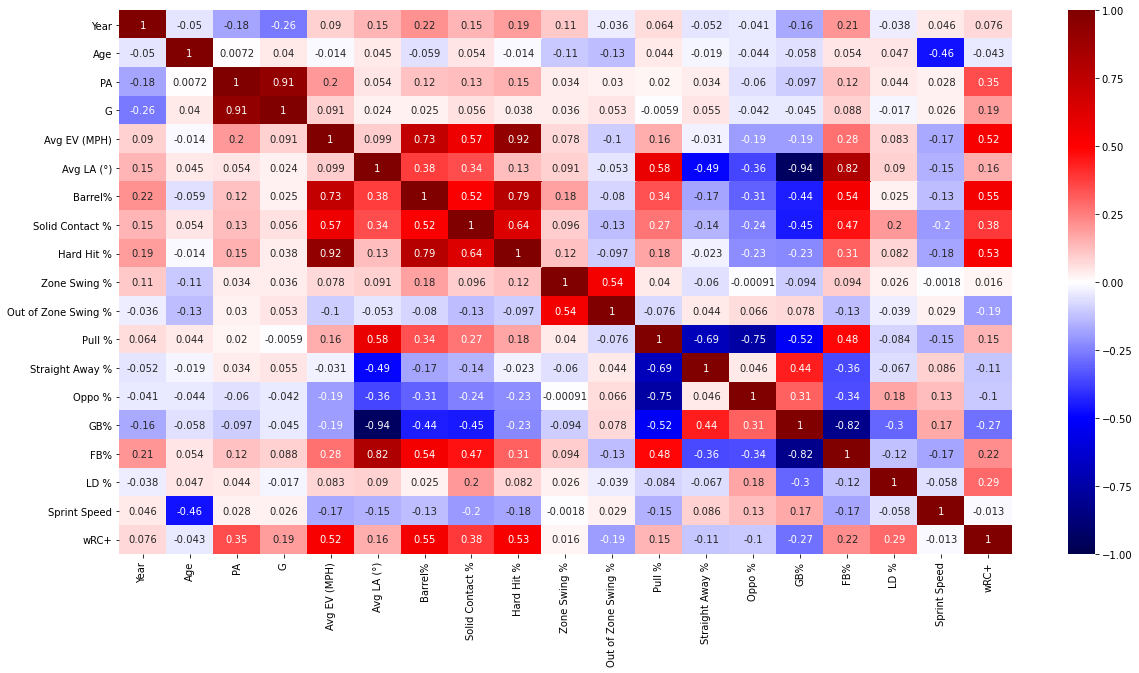

In [8]:
sns.heatmap(stats_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

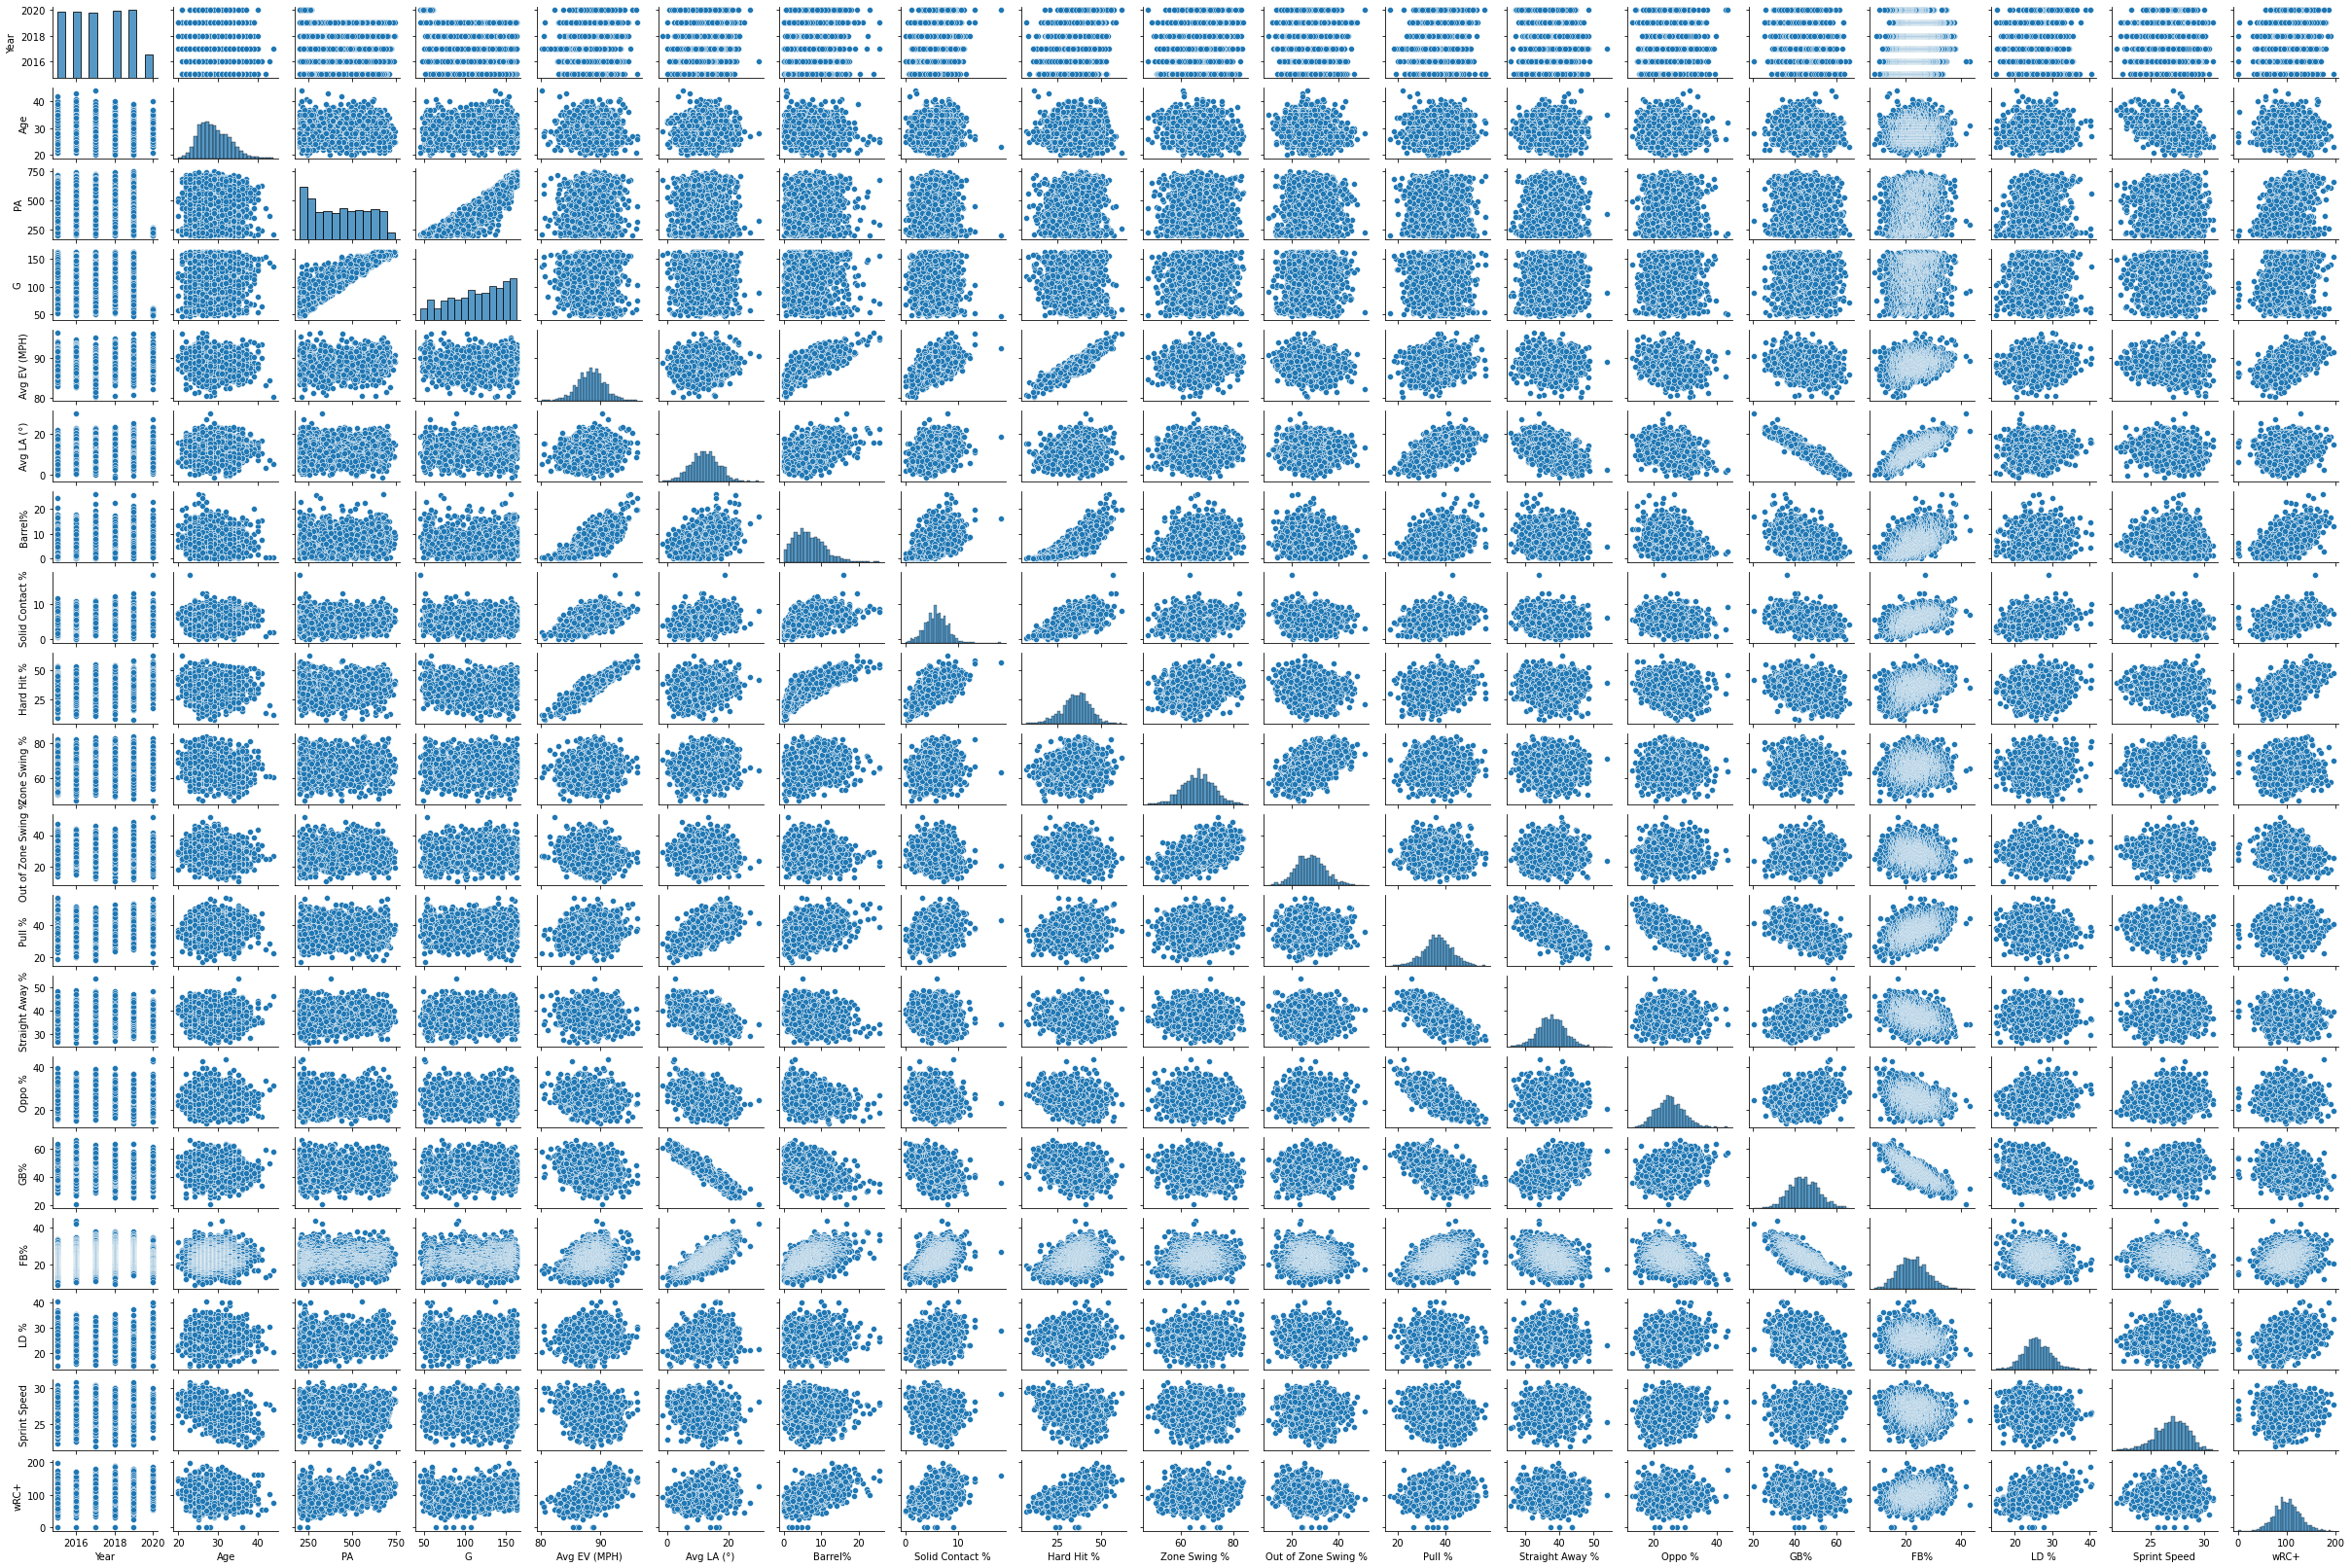

In [9]:
sns.pairplot(stats_df, height=1.2, aspect=1.5);

In [10]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               1893 non-null   object 
 1   Year                 1893 non-null   float64
 2   Age                  1893 non-null   float64
 3   PA                   1893 non-null   float64
 4   G                    1893 non-null   float64
 5   Avg EV (MPH)         1893 non-null   float64
 6   Avg LA (°)           1893 non-null   float64
 7   Barrel%              1893 non-null   float64
 8   Solid Contact %      1893 non-null   float64
 9   Hard Hit %           1893 non-null   float64
 10  Zone Swing %         1893 non-null   float64
 11  Out of Zone Swing %  1893 non-null   float64
 12  Pull %               1893 non-null   float64
 13  Straight Away %      1893 non-null   float64
 14  Oppo %               1893 non-null   float64
 15  GB%                  1893 non-null   f

## Lasso:

Setting up a new DF:

In [11]:
lasso_df = stats_df.drop(columns=['Player', 'Year', 'PA', 'G', 'Player Link_x', 'Player_Year_ID', 'Position'])

In [12]:
lasso_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1893 non-null   float64
 1   Avg EV (MPH)         1893 non-null   float64
 2   Avg LA (°)           1893 non-null   float64
 3   Barrel%              1893 non-null   float64
 4   Solid Contact %      1893 non-null   float64
 5   Hard Hit %           1893 non-null   float64
 6   Zone Swing %         1893 non-null   float64
 7   Out of Zone Swing %  1893 non-null   float64
 8   Pull %               1893 non-null   float64
 9   Straight Away %      1893 non-null   float64
 10  Oppo %               1893 non-null   float64
 11  GB%                  1893 non-null   float64
 12  FB%                  1893 non-null   float64
 13  LD %                 1893 non-null   float64
 14  Sprint Speed         1893 non-null   float64
 15  wRC+                 1893 non-null   i

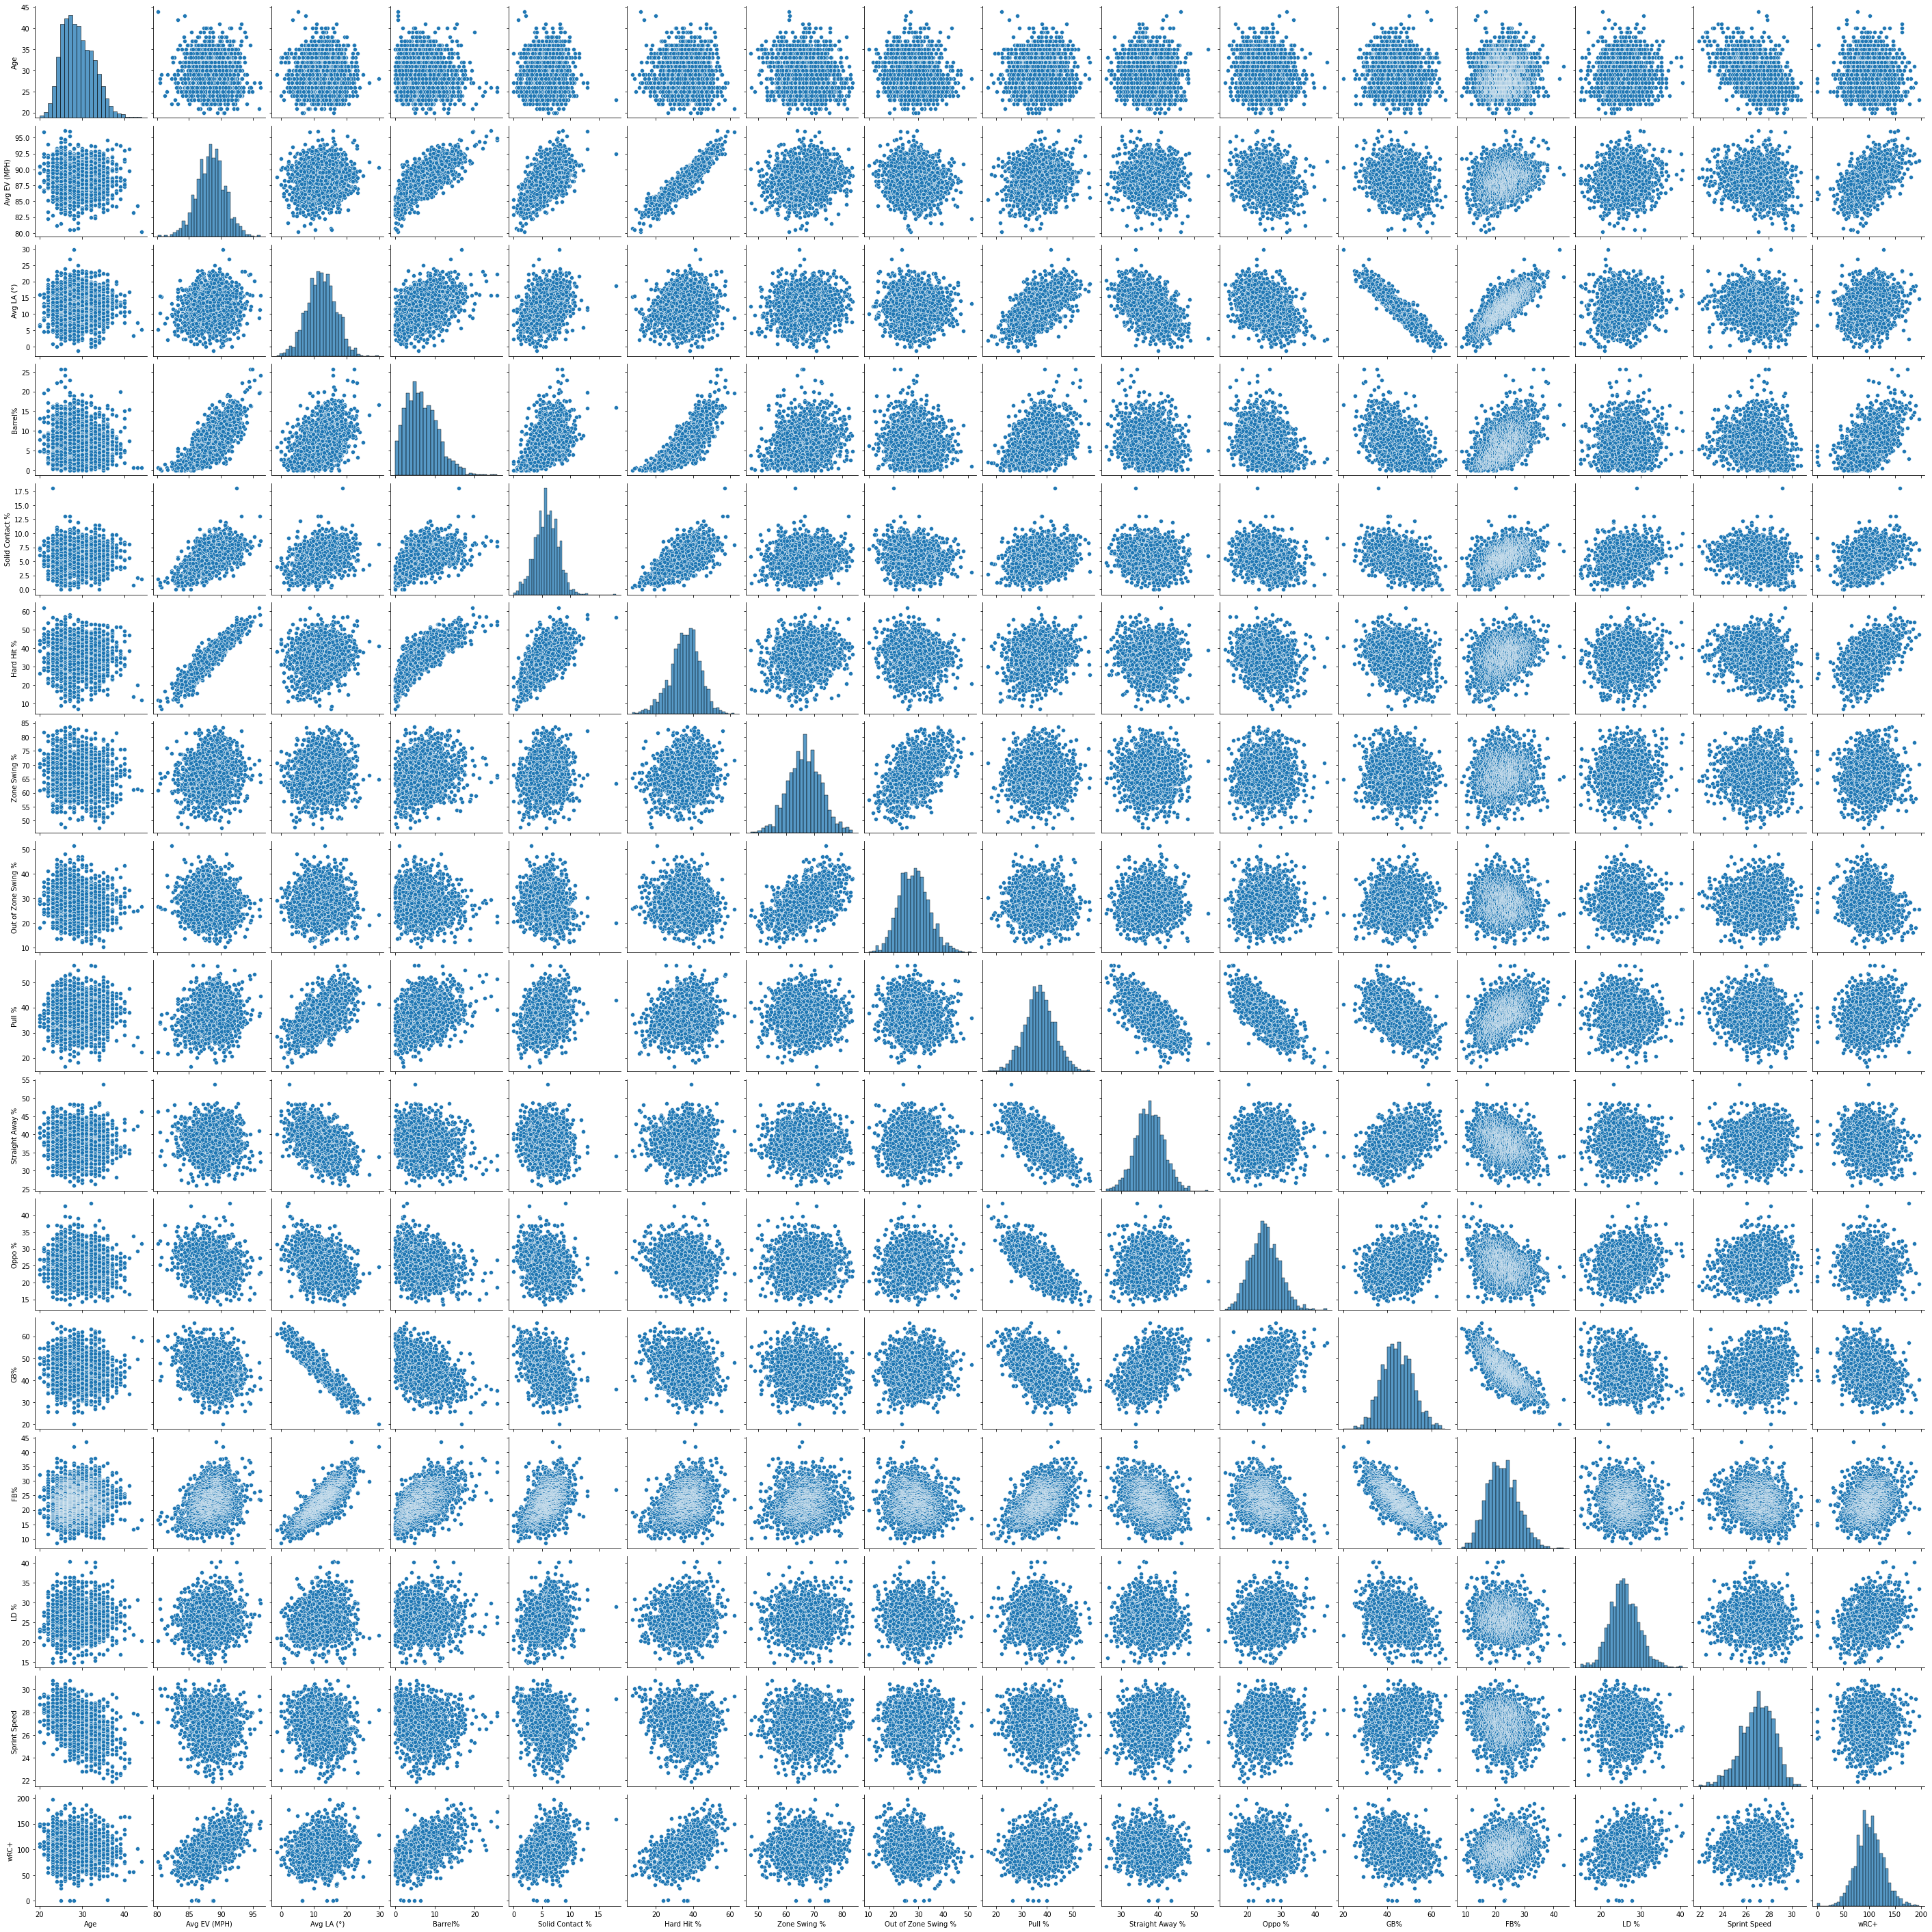

In [13]:
sns.pairplot(lasso_df)

Splitting the data:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
X = lasso_df.drop(columns='wRC+')
y = lasso_df['wRC+']

In [16]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [17]:
X_train.shape, X_val.shape, X_test.shape

((1135, 15), (379, 15), (379, 15))

Using standard-scaling on training features:

In [18]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [19]:
X_tr = std.transform(X_train.values)

In [20]:
X_te = std.transform(X_test.values)

Testing a few values of alpha:

In [21]:
lasso_model = Lasso(alpha = 10)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10)

In [22]:
list(zip(X_train.columns, lasso_model.coef_))

[('Age', -0.0),
 ('Avg EV (MPH)', 1.0789661355111448),
 ('Avg LA (°)', 0.0),
 ('Barrel%', 3.1596467256526855),
 ('Solid Contact %', 0.0),
 ('Hard Hit %', 0.0),
 ('Zone Swing %', -0.0),
 ('Out of Zone Swing %', -0.0),
 ('Pull %', 0.0),
 ('Straight Away %', -0.0),
 ('Oppo %', -0.0),
 ('GB%', -0.0),
 ('FB%', 0.0),
 ('LD %', 0.0),
 ('Sprint Speed', 0.0)]

In [23]:
lasso_model = Lasso(alpha = 5)
lasso_model.fit(X_tr,y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('Age', -0.0),
 ('Avg EV (MPH)', 3.7508818041495027),
 ('Avg LA (°)', 0.0),
 ('Barrel%', 6.210024464501367),
 ('Solid Contact %', 0.0),
 ('Hard Hit %', 0.0),
 ('Zone Swing %', -0.0),
 ('Out of Zone Swing %', -0.0),
 ('Pull %', 0.0),
 ('Straight Away %', -0.0),
 ('Oppo %', -0.0),
 ('GB%', -0.0),
 ('FB%', 0.0),
 ('LD %', 1.906825754061818),
 ('Sprint Speed', 0.0)]

In [24]:
lasso_model = Lasso(alpha = 2)
lasso_model.fit(X_tr,y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('Age', -0.0),
 ('Avg EV (MPH)', 5.120358726389829),
 ('Avg LA (°)', 0.0),
 ('Barrel%', 8.115853454209208),
 ('Solid Contact %', 0.0),
 ('Hard Hit %', 0.0),
 ('Zone Swing %', -0.0),
 ('Out of Zone Swing %', -1.9856298667975656),
 ('Pull %', 0.0),
 ('Straight Away %', -0.0),
 ('Oppo %', -0.0),
 ('GB%', -0.0),
 ('FB%', 0.0),
 ('LD %', 4.7313122328135915),
 ('Sprint Speed', 0.7329750134660844)]

Tuning Regularization Strength via Validation:

In [25]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [26]:
alphalist = (np.linspace(-20,100))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,:].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,:].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

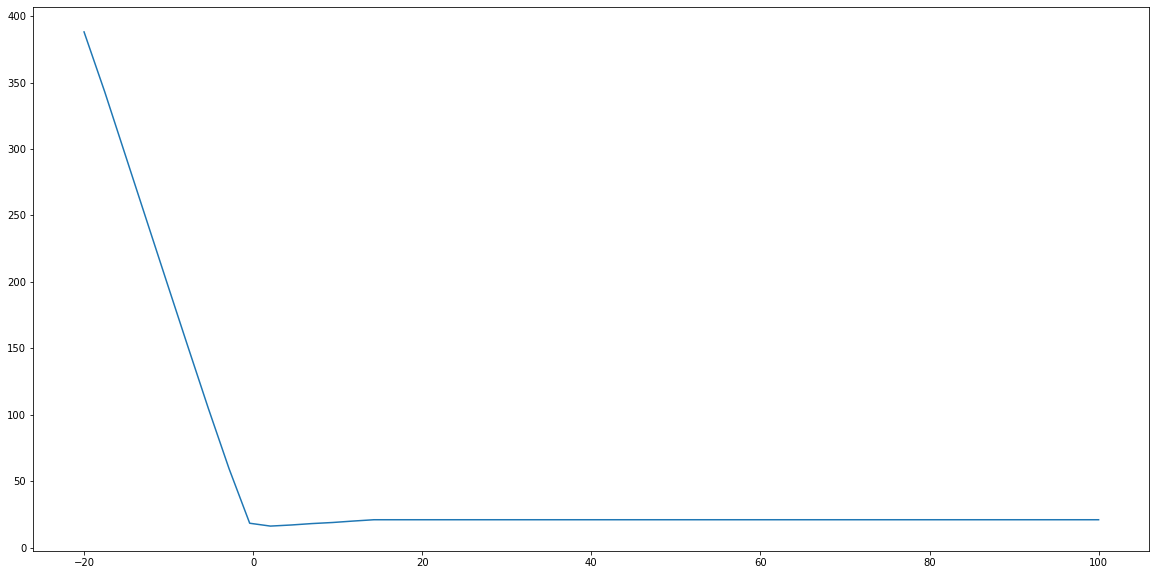

In [27]:
plt.plot(alphalist, err_vec_val)

In [28]:
np.min(err_vec_val)

16.4329613186198

In [29]:
alphalist[np.argmin(err_vec_val)]

2.0408163265306136

Automated Regularization Strength Tuning via Cross Validation:

In [30]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [31]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [32]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = np.linspace(-20,100)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([-20.        , -17.55102041, -15.10204082, -12.65306122,
       -10.20408163,  -7.75510204,  -5.30612245,  -2.85714286,
        -0.40816327,   2.04081633,   4.48979592,   6.93877551,
         9.3877551 ,  11.83673469,  14.28571429,  16.73469388,
        19.18367347,  21.63265306,  24.08163265,  26.53061224,
        28.97959184,  31.42857143,  33.87755102,  36.32653061,
        38.7755102 ,  41.2244898 ,  43.67346939,  46.12244898,
        48.57142857,  51.02040816,  53.46938776,  55.91836735,
        58.36734694,  60.81632653,  63.26530612,  65.71428571,
        68.16326531,  70.6122449 ,  73.06122449,  75.51020408,
        77.95918367,  80.40816327,  82.85714286,  85.30612245,
        87.75510204,  90.20408163,  92.65306122,  95.10204082,
        97.55102041, 100.        ]),
        cv=5)

In [33]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

2.0408163265306136

In [34]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Age', -0.0),
 ('Avg EV (MPH)', 5.09673491957632),
 ('Avg LA (°)', 0.0),
 ('Barrel%', 8.089730548200457),
 ('Solid Contact %', 0.0),
 ('Hard Hit %', 0.0),
 ('Zone Swing %', -0.0),
 ('Out of Zone Swing %', -1.9482407812474551),
 ('Pull %', 0.0),
 ('Straight Away %', -0.0),
 ('Oppo %', -0.0),
 ('GB%', -0.0),
 ('FB%', 0.0),
 ('LD %', 4.692828767333858),
 ('Sprint Speed', 0.6833175212572723)]

In [35]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [36]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

15.392271771679152

In [37]:
r2_score(y_test, test_set_pred)

0.4143510804499503

So, the MAE is about 15.39 for the wRC+.  Since the stat is based on league average (i.e. 100 is league average), it could be about 16% off from teh true value of production.  Not terrible, but should be improved. R^2 of 0.414 also leaves something to be desired, as my project goal would be to have this physical, statcast data account for a greater amount of variance of wRC+.

Based on LASSO on the optimal alpha (2.0408..), the most important features are: Avg. EV, Barrel%, Out of ZOne Swing % (Negative), LD%, and sprint speed.  These do make sense to me, since hitting the ball harder (EV) and on the barrel (Barrel %), along with a high rate of line drives would result in better offensive performance.  Likewise, chasing too many bad pitches would lead to reduction.

### Using LARS Path to Study Feature Importance:

In [38]:
from sklearn.linear_model import lars_path

In [39]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [40]:
X_tr = std.transform(X_train.values)

In [41]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


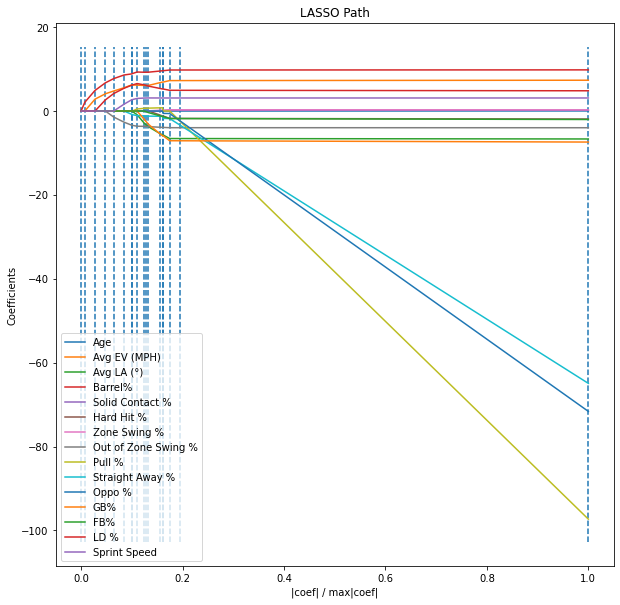

In [42]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

## RIDGE Regression

In [90]:
ridge_df = stats_df.drop(columns=['Player', 'Year', 'PA', 'G', 'Player Link_x', 'Player_Year_ID', 'Position'])

In [91]:
X = ridge_df.drop(columns='wRC+')
y = ridge_df['wRC+']

In [92]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [93]:
X_train_val.shape, X_test.shape

((1514, 15), (379, 15))

Testing on val set:

In [79]:
X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)

In [83]:
#run the CV, doing 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state = 2)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X_train_val,y_train_val):
    
    X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
    X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 
    
    #Ridge regression
    lr_model_ridge = Ridge(alpha = 2)
    lr_model_ridge.fit(X_train, y_train)
    cv_lm_r2s.append(lr_model_ridge.score(X_val, y_val))

print('Ridge regression scores: ', cv_lm_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

Ridge regression scores:  [0.3447269399565983, 0.37745969935871926, 0.5047847691282433, 0.40948409512613226, 0.4568803903174551, 0.4126415447684799, 0.4271247870030074, 0.3269515580852287, 0.3483004754279416, 0.4701811020568454]
Ridge mean cv r^2: 0.408 +- 0.056


Train on Test/Val Set:

In [84]:
lr_model_ridge.fit(X_train_val, y_train_val)

Ridge(alpha=2)

Running on Test Set:

In [85]:
ridge_test_set_pred = lr_model_ridge.predict(X_test)

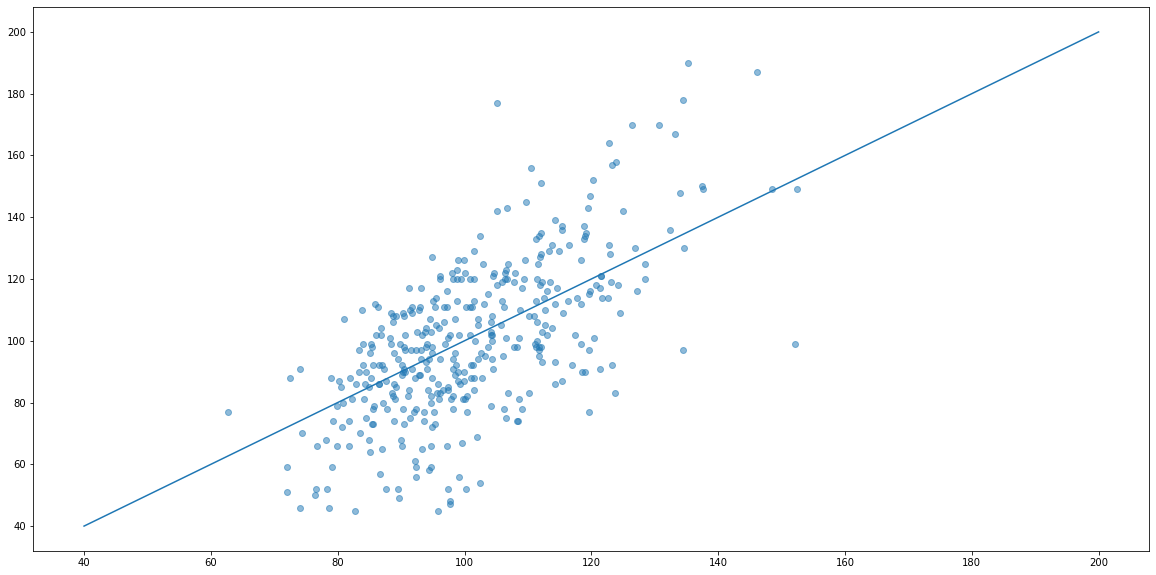

In [86]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(40,200), np.linspace(40,200))

In [87]:
#r-squared
r2_score(y_test, ridge_test_set_pred)

0.42899658953558506

In [88]:
mae(y_test, ridge_test_set_pred)

15.34297424485956

So ridge out performs the test, and is looking as good as any other models I've seen so far.

Automated Regularization Stength

In [94]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train_val.values)

StandardScaler()

In [96]:
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)

In [98]:
alphavec = np.linspace(-20,50)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train_val)

RidgeCV(alphas=array([-20.        , -18.57142857, -17.14285714, -15.71428571,
       -14.28571429, -12.85714286, -11.42857143, -10.        ,
        -8.57142857,  -7.14285714,  -5.71428571,  -4.28571429,
        -2.85714286,  -1.42857143,   0.        ,   1.42857143,
         2.85714286,   4.28571429,   5.71428571,   7.14285714,
         8.57142857,  10.        ,  11.42857143,  12.85714286,
        14.28571429,  15.71428571,  17.14285714,  18.57142857,
        20.        ,  21.42857143,  22.85714286,  24.28571429,
        25.71428571,  27.14285714,  28.57142857,  30.        ,
        31.42857143,  32.85714286,  34.28571429,  35.71428571,
        37.14285714,  38.57142857,  40.        ,  41.42857143,
        42.85714286,  44.28571429,  45.71428571,  47.14285714,
        48.57142857,  50.        ]),
        cv=5)

In [99]:
ridge_model.alpha_

27.142857142857146

In [101]:
list(zip(X_train_val.columns, ridge_model.coef_))

[('Age', -0.0811741659081745),
 ('Avg EV (MPH)', 5.256026906306912),
 ('Avg LA (°)', -3.2569446429679005),
 ('Barrel%', 9.253354772900492),
 ('Solid Contact %', 0.1111826873918518),
 ('Hard Hit %', 1.027523653626328),
 ('Zone Swing %', 0.007861256284011443),
 ('Out of Zone Swing %', -3.265275277905455),
 ('Pull %', 0.35944726392631426),
 ('Straight Away %', -0.9959876593171266),
 ('Oppo %', -0.11674099005176347),
 ('GB%', -3.510543220218588),
 ('FB%', -0.8742509659172947),
 ('LD %', 5.688070772460001),
 ('Sprint Speed', 2.8542137418195153)]

In [102]:
test_set_pred = ridge_model.predict(X_te)

In [103]:
mae(y_test, test_set_pred)

15.332080547978041

In [104]:
r2_score(y_test, test_set_pred)

0.42846191014913426

Overall, Ridge is performing better than Lasso based on the above.  Since the models so have relatively high MAE so far, I think it would be worthwhile to do some additional features engineering.

### NEXT: features_test_notebook